### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Seleccionar columnas necesarias
columnas_utiles = ['Producto', 'Precio', 'Calificación', 'Costo de envío']

tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

tienda_filtrada = tienda[columnas_utiles + ['Tienda']]
tienda2_filtrada = tienda2[columnas_utiles + ['Tienda']]
tienda3_filtrada = tienda3[columnas_utiles + ['Tienda']]
tienda4_filtrada = tienda4[columnas_utiles + ['Tienda']]

# Unimos los datos filtrados
df = pd.concat([tienda_filtrada, tienda2_filtrada, tienda3_filtrada, tienda4_filtrada], ignore_index=True)

In [ ]:
# Agrupamos por tienda y calculamos
resumen = df.groupby('Tienda').agg({
    'Precio': ['sum', 'mean'],
    'Calificación': 'mean',
    'Costo de envío': 'mean',
    'Producto': 'count'
})

# Ajustar nombres de columnas
resumen.columns = ['Ventas Totales', 'Ticket Promedio', 'Calificación Promedio', 'Costo Envio Promedio', 'Número de Ventas']
resumen = resumen.reset_index()

<ipython-input-7-6956a1f3a0b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumen, x='Tienda', y='Ventas Totales', palette='viridis')


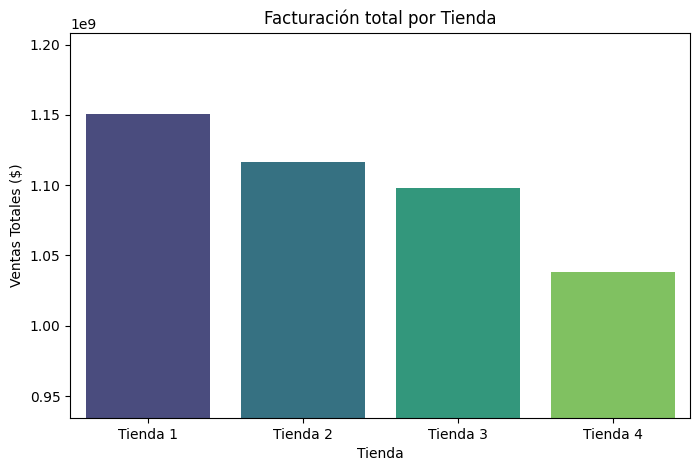

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=resumen, x='Tienda', y='Ventas Totales', palette='viridis')
plt.title('Facturación total por Tienda')
plt.ylabel('Ventas Totales ($)')
plt.xlabel('Tienda')

# Ajuste de límites para "zoom"
min_ventas = resumen['Ventas Totales'].min()
max_ventas = resumen['Ventas Totales'].max()
plt.ylim(min_ventas * 0.9, max_ventas * 1.05)

plt.show()

** ¿Qué muestra la gráfica?**
La gráfica presenta la suma total de las ventas realizadas por cada tienda, es decir, cuánto dinero generó cada una en el periodo analizado.

Observaciones:
Tienda 1 es la que más factura, superando los 1.15 mil millones.
Tienda 2 y Tienda 3 están muy cerca entre sí, con una facturación ligeramente menor (alrededor de 1.10 y 1.099 mil millones).
Tienda 4 tiene la menor facturación, por debajo de 1.05 mil millones, siendo la única por debajo de ese umbral.
Interpretación:
Aunque las diferencias no son extremas, Tienda 4 se encuentra claramente por detrás en volumen de ventas monetarias.
Esta diferencia puede ser una señal de menor demanda, problemas de visibilidad, estrategia de productos poco efectiva o incluso precios menos competitivos.
Si esto se complementa con baja calificación, pocos productos vendidos y costos de envío altos, Tienda 4 podría ser candidata al cierre o reestructuración.





# 2. Ventas por categoría

<Figure size 1400x1800 with 0 Axes>

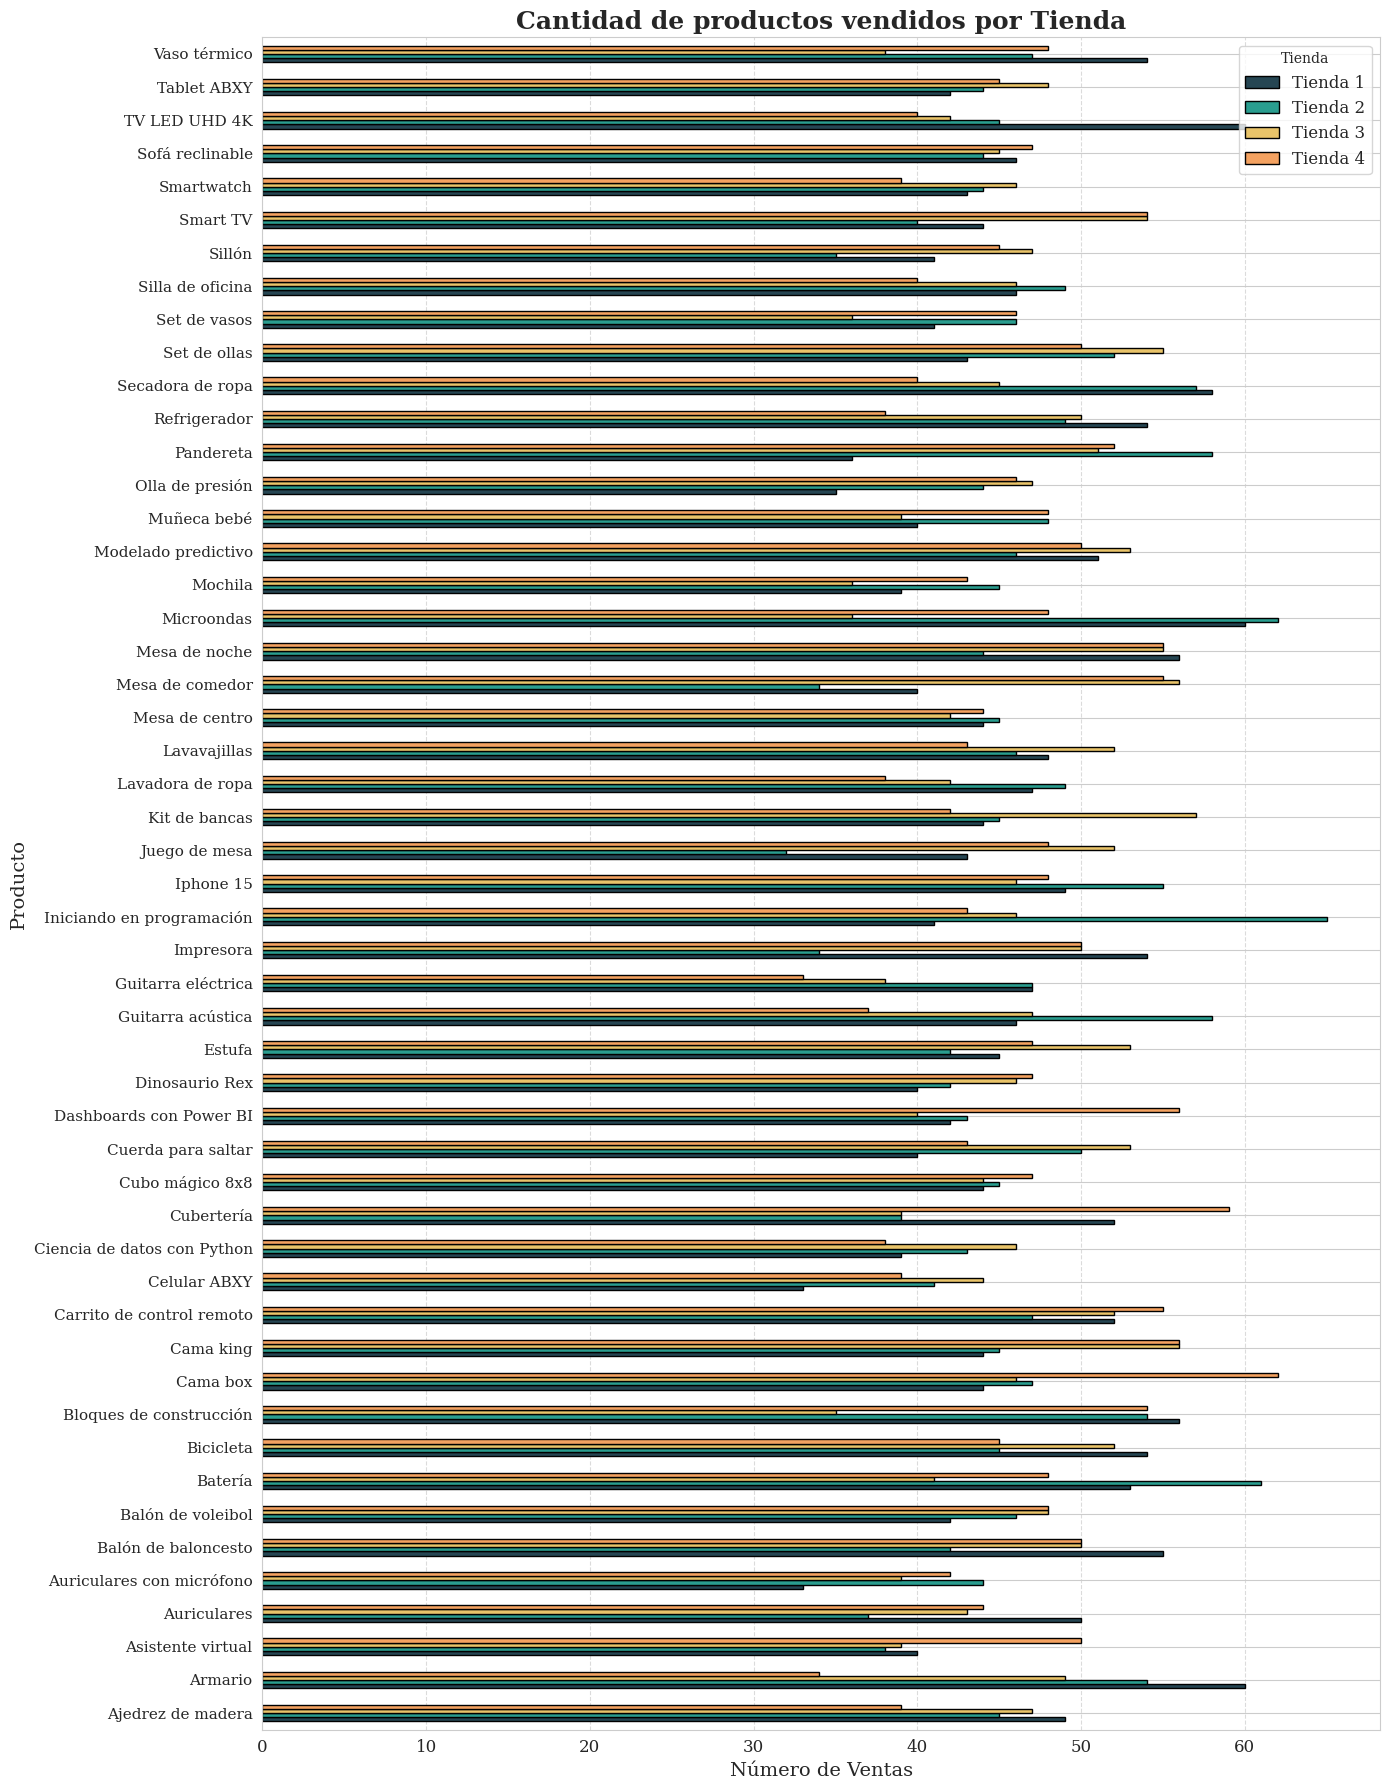

In [ ]:
# Activar estilo científico
sns.set_style("whitegrid")
plt.rc('axes', titlesize=18, labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=11)
plt.rc('legend', fontsize=12)
plt.rc('font', family='serif')  # Fuente tipo serif, más formal

# Crear figura
plt.figure(figsize=(14,18))

# Agrupamos ventas
ventas_productos = df.groupby(['Producto', 'Tienda']).size().unstack()

# Graficar
ax = ventas_productos.plot(
    kind='barh',
    stacked=False,
    figsize=(14,18),
    color=['#264653', '#2a9d8f', '#e9c46a', '#f4a261'],  # paleta sobria
    edgecolor='black'
)

# Fondo blanco del gráfico
ax.set_facecolor('white')
plt.gcf().set_facecolor('white')

# Agregar líneas de cuadrícula discretas
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Títulos y etiquetas
plt.title('Cantidad de productos vendidos por Tienda', weight='bold')
plt.xlabel('Número de Ventas')
plt.ylabel('Producto')
plt.legend(title='Tienda')
plt.tight_layout()

plt.show()

# 3. Calificación promedio de la tienda


<ipython-input-9-2f12017fcbfc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumen, x='Tienda', y='Calificación Promedio', palette='coolwarm')


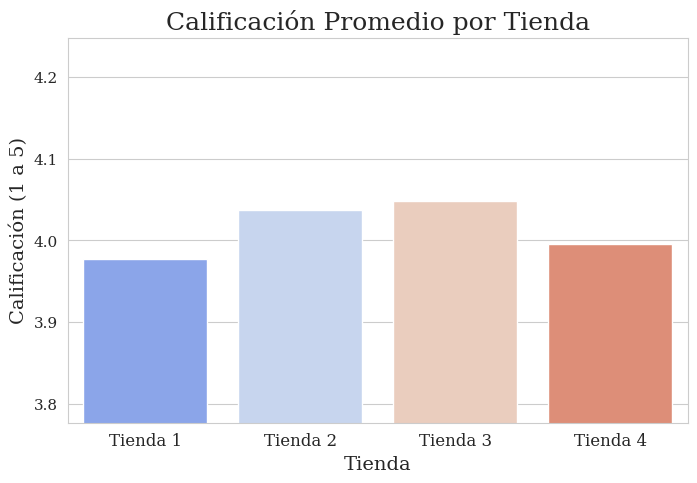

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=resumen, x='Tienda', y='Calificación Promedio', palette='coolwarm')
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación (1 a 5)')
plt.xlabel('Tienda')

# Zoom: un pequeño rango entre el mínimo y máximo
min_calif = resumen['Calificación Promedio'].min()
max_calif = resumen['Calificación Promedio'].max()
plt.ylim(min_calif - 0.2, max_calif + 0.2)

plt.show()

# 4. Productos más y menos vendidos

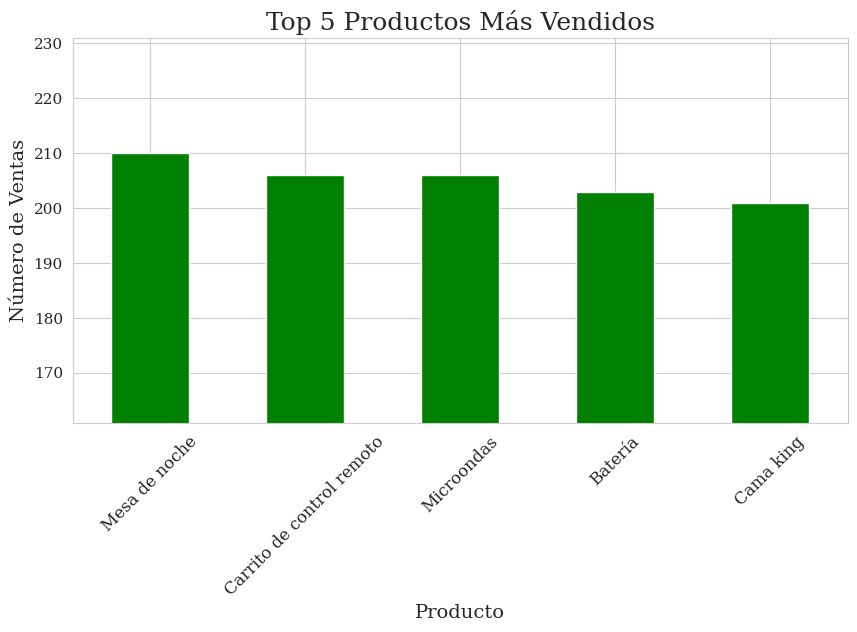

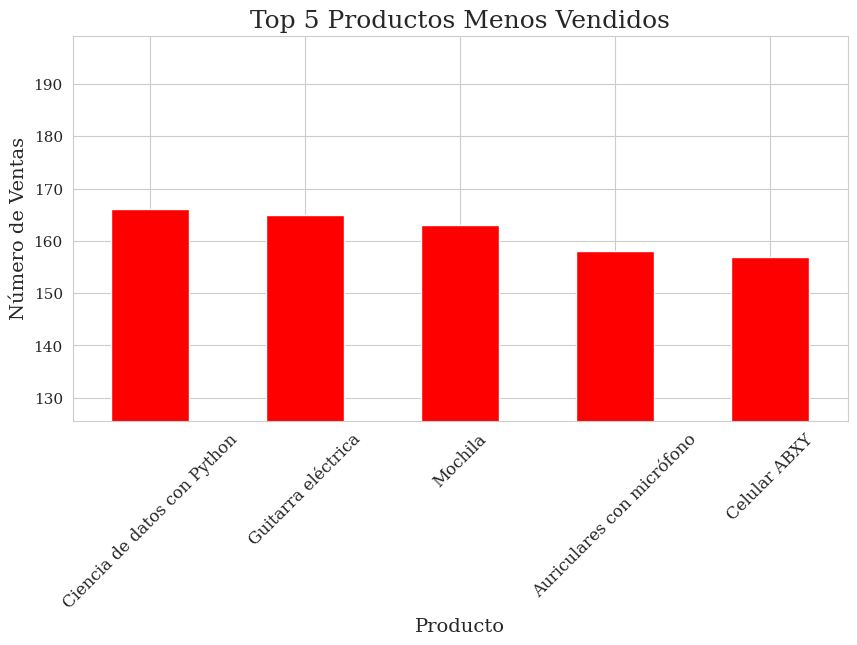

In [ ]:
# Calculate top 5 products
top_5 = df['Producto'].value_counts().head(5)
# Calculate bottom 5 products #Added this line
bottom_5 = df['Producto'].value_counts().tail(5) #Added this line


# Top 5 más vendidos
plt.figure(figsize=(10,5))
top_5.plot(kind='bar', color='green')
plt.title('Top 5 Productos Más Vendidos')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)

# Zoom en ventas
plt.ylim(top_5.min() * 0.8, top_5.max() * 1.1)

plt.show()

# Top 5 menos vendidos
plt.figure(figsize=(10,5))
bottom_5.plot(kind='bar', color='red')
plt.title('Top 5 Productos Menos Vendidos')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)

# Zoom en ventas
plt.ylim(bottom_5.min() * 0.8, bottom_5.max() * 1.2)

plt.show()

# 5. Envío promedio por tienda

<ipython-input-11-5276c2e7d762>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumen, x='Tienda', y='Costo Envio Promedio', palette='rocket')


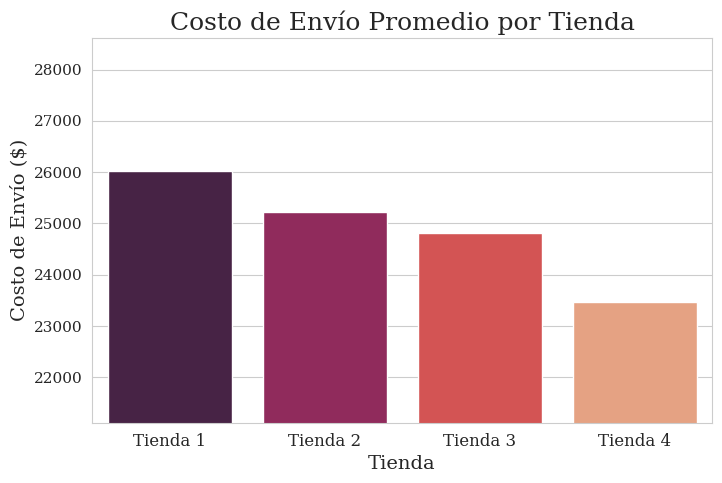

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=resumen, x='Tienda', y='Costo Envio Promedio', palette='rocket')
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo de Envío ($)')
plt.xlabel('Tienda')

# Zoom: más detalle en diferencias de envío
min_envio = resumen['Costo Envio Promedio'].min()
max_envio = resumen['Costo Envio Promedio'].max()
plt.ylim(min_envio * 0.9, max_envio * 1.1)

plt.show()

In [ ]:
 Recomendación:

  1) Mantener Tienda 1
  posee alto rendimiento económico y cobertura en una zona clave del país.

  2)  Vender la Tienda 4
Se recomienda al Sr Juan que venda la Tienda 4, ya que:

* Tiene menor volumen de ventas
* Su relación ingreso/costo de envío es la más eficiente del grupo.
* Su ubicación es la menos estratégica
* Es la menos rentable en términos de utilidad estimada.
*  No presenta ventajas diferenciales en calificación de productos que justifiquen su permanencia.
